# Analisis Velocidad: 12 de Abril
# Juan David Galan Vargas - 202111470

In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
from scipy.stats import linregress

In [26]:


def read_csv_files(folder_path):
    # Initialize an empty dictionary to store DataFrames
    dfs = []
    
    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a CSV file
        if filename.endswith(".csv"):
            # Construct the full file path
            file_path = os.path.join(folder_path, filename)
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            df.columns = ["V_air", "V_ritz"]
            # Store the DataFrame in the dictionary with the file name as the key
            dfs.append(df)
    
    return dfs

# Path to the folder containing CSV files
folder_path = r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\7 Semestre\Proyecto Experimental\sol abril 12\Velocidades"
# Call the function to read CSV files and create DataFrames
dataframes = read_csv_files(folder_path)




In [27]:
dataframes[0].mean(), dataframes[0].median(), trim_mean(dataframes[0], 0.15)

(V_air    -565.634836
 V_ritz   -589.091966
 dtype: float64,
 V_air    -475.690710
 V_ritz   -442.432388
 dtype: float64,
 array([-595.25197681, -576.0615742 ]))

In [58]:
d=(dataframes[0])
type(d["V_air"].mean())

numpy.float64

In [50]:
dataframes[0].mean()

V_air    -565.634836
V_ritz   -589.091966
dtype: float64

In [65]:
medias_air=[]
medianas_air=[]
mediana_truncadas_air=[]
for i in range(len(dataframes)):
    d=(dataframes[i])
    medias_air.append(d["V_air"].mean())
    medianas_air.append(np.median(d["V_air"]))
    mediana_truncadas_air.append(trim_mean(d["V_air"], 0.1))
medias_r=[]
medianas_r=[]
mediana_truncadas_r=[]
for i in range(len(dataframes)):
    d=(dataframes[i])
    medias_r.append(d["V_ritz"].mean())
    medianas_r.append(d["V_ritz"].median())
    mediana_truncadas_r.append(trim_mean(d["V_ritz"], 0.1))

In [75]:
x=np.linspace(-4,4,9)

0.9778139027505328
0.9776718368795576
0.9715451133163097
0.9707755424434582
0.9775484344199336
0.9774353085779239


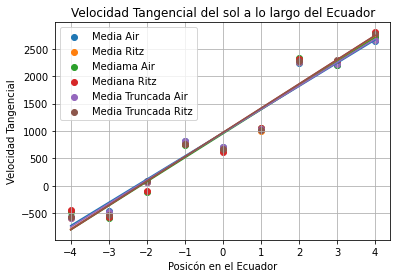

In [77]:
plt.scatter(x,medias_air,label="Media Air")
slope, intercept, r_value, p_value, std_err = linregress(x, medias_air)
plt.plot(x,x*slope+intercept)
print(r_value)
plt.scatter(x,medias_r,label="Media Ritz")
slope, intercept, r_value, p_value, std_err = linregress(x, medias_r)
plt.plot(x,x*slope+intercept)
print(r_value)
plt.scatter(x,medianas_air,label="Mediama Air")
slope, intercept, r_value, p_value, std_err = linregress(x, medianas_air)
plt.plot(x,x*slope+intercept)
print(r_value)
plt.scatter(x,medianas_r,label="Mediana Ritz")
slope, intercept, r_value, p_value, std_err = linregress(x, medianas_r)
plt.plot(x,x*slope+intercept)
print(r_value)
plt.scatter(x,mediana_truncadas_air,label="Media Truncada Air")
slope, intercept, r_value, p_value, std_err = linregress(x, mediana_truncadas_air)
plt.plot(x,x*slope+intercept)
print(r_value)
plt.scatter(x,mediana_truncadas_r, label="Media Truncada Ritz")
slope, intercept, r_value, p_value, std_err = linregress(x, mediana_truncadas_r)
plt.plot(x,x*slope+intercept)
print(r_value)
plt.title("Velocidad Tangencial del sol a lo largo del Ecuador")
plt.xlabel("Posicón en el Ecuador")
plt.ylabel("Velocidad Tangencial")
plt.legend()
plt.grid(True)